In [44]:
import pandas as pd

In [45]:
#reading data
data = pd.read_csv(r"C:\Users\GU44DR\student.csv", sep=';')

In [46]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [47]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [48]:
missings = data.isnull().sum().sum()
missings

0

In [49]:
# Any missing values?
data.isnull().values.any()

False

In [50]:
#creating a binary target variable
data['alcohol_week'] = data['Dalc'].apply(lambda x: 1 if x >=2 else 0)
data['alcohol_weekend'] = data['Walc'].apply(lambda x: 1 if x >=2 else 0)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn import tree

In [52]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,alcohol_week,alcohol_weekend
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,0,1


In [53]:
data['schoolsup'].unique()

array(['yes', 'no'], dtype=object)

In [54]:
data['Mjob'].unique()
data['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data.Sex = le.fit_transform(data.Sex)

In [55]:
data['school2'] = data['school'].apply(lambda x: 1 if x =='GP' else 0)
data['sex2'] = data['sex'].apply(lambda x: 1 if x =='F' else 0)
data['address2'] = data['address'].apply(lambda x: 1 if x =='U' else 0)
data['famsize2'] = data['famsize'].apply(lambda x: 1 if x =='LE3' else 0)
data['Pstatus2'] = data['Pstatus'].apply(lambda x: 1 if x =='T' else 0)
data['schoolsup2'] = data['schoolsup'].apply(lambda x: 1 if x =='yes' else 0)
data['famsup2'] = data['famsup'].apply(lambda x: 1 if x =='yes' else 0)
data['paid2'] = data['paid'].apply(lambda x: 1 if x =='yes' else 0)
data['activities2'] = data['activities'].apply(lambda x: 1 if x =='yes' else 0)
data['nursery2'] = data['nursery'].apply(lambda x: 1 if x =='yes' else 0)
data['higher2'] = data['higher'].apply(lambda x: 1 if x =='yes' else 0)
data['internet2'] = data['internet'].apply(lambda x: 1 if x =='yes' else 0)
data['romantic2'] = data['romantic'].apply(lambda x: 1 if x =='yes' else 0)
  

In [56]:
data['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [57]:
#Categorization of the Domicile variable
# Defining all the conditions inside a function
def condition(x):
    if x=="at_home":
        return 0
    elif x=="health":
        return 1
    elif x=="services":
        return 2
    elif x=="teacher":
        return 3
    else:
        return 4
 
# Applying the conditions
data['Mjob2'] = data['Mjob'].apply(condition)

In [58]:
data['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [59]:
#Categorization of the Domicile variable
# Defining all the conditions inside a function
def condition(x):
    if x=="at_home":
        return 0
    elif x=="health":
        return 1
    elif x=="services":
        return 2
    elif x=="teacher":
        return 3
    else:
        return 4
 
# Applying the conditions
data['Fjob2'] = data['Fjob'].apply(condition)

In [60]:
data['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [61]:
#Categorization of the Domicile variable
# Defining all the conditions inside a function
def condition(x):
    if x=="home":
        return 0
    elif x=="home":
        return 1
    elif x=="course":
        return 2
    else:
        return 3
 
# Applying the conditions
data['reason2'] = data['reason'].apply(condition)

In [62]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [63]:
#Categorization of the Domicile variable
# Defining all the conditions inside a function
def condition(x):
    if x=="mother":
        return 0
    elif x=="father":
        return 1
    else:
        return 2
 
# Applying the conditions
data['guardian2'] = data['guardian'].apply(condition)

In [64]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,paid2,activities2,nursery2,higher2,internet2,romantic2,Mjob2,Fjob2,reason2,guardian2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,1,1,0,0,0,3,2,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,0,1,1,0,0,4,2,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,0,1,1,1,0,0,4,3,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,1,1,1,1,1,1,2,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,1,1,0,0,4,4,0,1


In [65]:
# Create the X and y data sets
X = data[['school2', 'sex2', 'age', 'address2', 'famsize2', 'Pstatus2', 'Medu', 'Fedu',
       'Mjob2', 'Fjob2', 'reason2', 'guardian2', 'traveltime', 'studytime',
       'failures', 'schoolsup2', 'famsup2', 'paid2', 'activities2', 'nursery2',
       'higher2', 'internet2', 'romantic2', 'famrel', 'freetime', 'goout', 'health', 'absences']]
y = data[['alcohol_week']]

In [66]:
# Using test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [67]:
from sklearn import tree

In [68]:
clf= tree.DecisionTreeClassifier(max_depth =5)
clf = clf.fit(X, y)

[Text(0.5451388888888888, 0.9166666666666666, 'X[1] <= 0.5\ngini = 0.424\nsamples = 649\nvalue = [451, 198]'),
 Text(0.2847222222222222, 0.75, 'X[25] <= 3.5\ngini = 0.495\nsamples = 266\nvalue = [146, 120]'),
 Text(0.1388888888888889, 0.5833333333333334, 'X[27] <= 11.5\ngini = 0.442\nsamples = 158\nvalue = [106, 52]'),
 Text(0.1111111111111111, 0.4166666666666667, 'X[0] <= 0.5\ngini = 0.422\nsamples = 152\nvalue = [106, 46]'),
 Text(0.05555555555555555, 0.25, 'X[24] <= 1.5\ngini = 0.5\nsamples = 43\nvalue = [21, 22]'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.49\nsamples = 35\nvalue = [20, 15]'),
 Text(0.16666666666666666, 0.25, 'X[23] <= 1.5\ngini = 0.343\nsamples = 109\nvalue = [85, 24]'),
 Text(0.1388888888888889, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.19444444444444445, 0.08333333333333333, 'gini = 0.327\nsamples = 107\nvalue = [85, 22]')

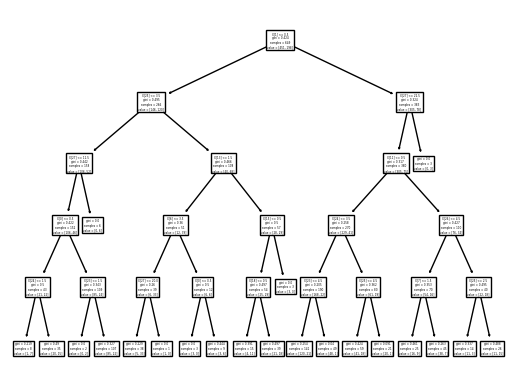

In [69]:
tree.plot_tree(clf)

In [70]:
import graphviz

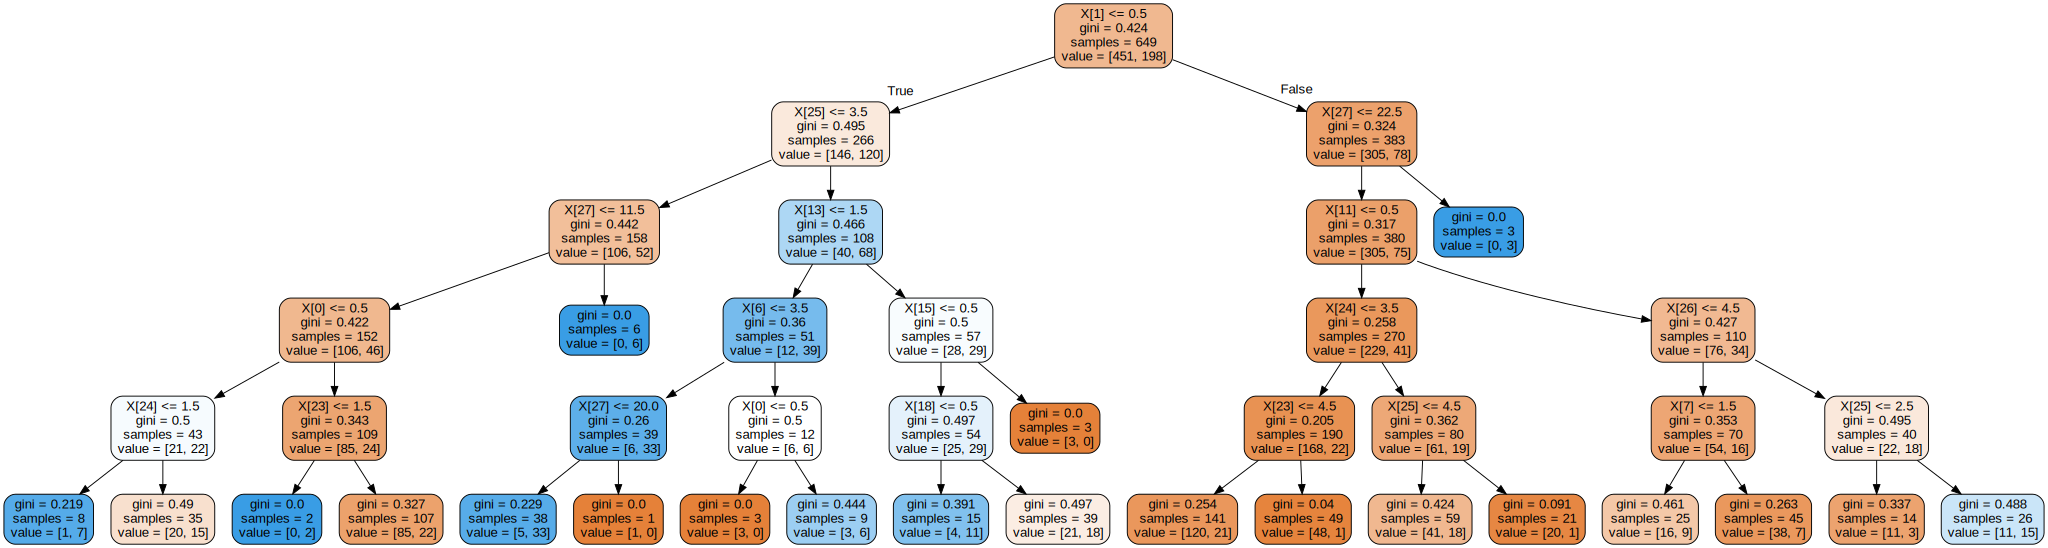

In [71]:
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

In [72]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

[Text(0.5107588523890785, 0.96875, 'X[1] <= 0.5\nsquared_error = 0.212\nsamples = 649\nvalue = 0.305'),
 Text(0.21469709897610922, 0.90625, 'X[25] <= 3.5\nsquared_error = 0.248\nsamples = 266\nvalue = 0.451'),
 Text(0.10132252559726962, 0.84375, 'X[27] <= 11.5\nsquared_error = 0.221\nsamples = 158\nvalue = 0.329'),
 Text(0.09449658703071673, 0.78125, 'X[0] <= 0.5\nsquared_error = 0.211\nsamples = 152\nvalue = 0.303'),
 Text(0.030716723549488054, 0.71875, 'X[24] <= 1.5\nsquared_error = 0.25\nsamples = 43\nvalue = 0.512'),
 Text(0.013651877133105802, 0.65625, 'X[27] <= 3.0\nsquared_error = 0.109\nsamples = 8\nvalue = 0.875'),
 Text(0.006825938566552901, 0.59375, 'squared_error = 0.0\nsamples = 7\nvalue = 1.0'),
 Text(0.020477815699658702, 0.59375, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.04778156996587031, 0.65625, 'X[20] <= 0.5\nsquared_error = 0.245\nsamples = 35\nvalue = 0.429'),
 Text(0.034129692832764506, 0.59375, 'X[14] <= 2.5\nsquared_error = 0.109\nsamples = 8\nv

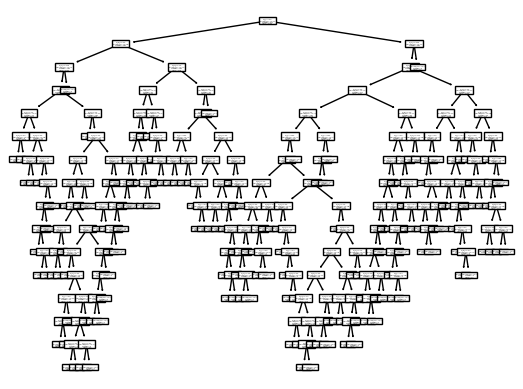

In [73]:
tree.plot_tree(clf)

In [76]:
pred = clf.predict(X_test) 

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0

In [80]:
dtree = tree.DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.6512820512820513
Criterion=entropy 0.6461538461538462


In [87]:
import matplotlib.pyplot as plt
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))
    ####
    dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))
 ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})


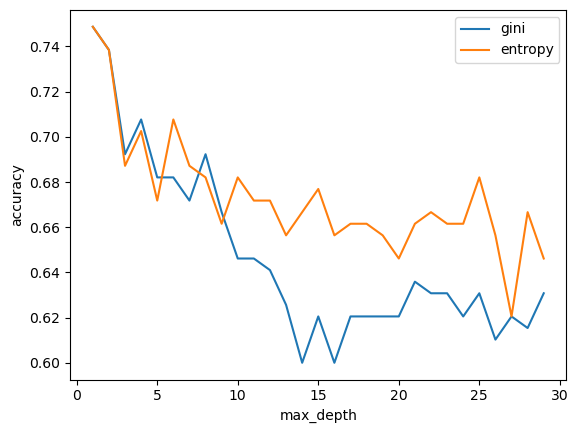

In [89]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [122]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_train)
print('Criterion=entropy', accuracy_score(y_train, pred))


Criterion=entropy 0.7048458149779736


In [123]:
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=entropy 0.7384615384615385


[Text(0.5, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.913\nsamples = 454\nvalue = [305, 149]'),
 Text(0.25, 0.5, 'X[27] <= 11.5\nentropy = 1.0\nsamples = 184\nvalue = [93, 91]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.993\nsamples = 169\nvalue = [93, 76]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.75, 0.5, 'X[11] <= 0.5\nentropy = 0.751\nsamples = 270\nvalue = [212, 58]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.605\nsamples = 189\nvalue = [161, 28]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.951\nsamples = 81\nvalue = [51, 30]')]

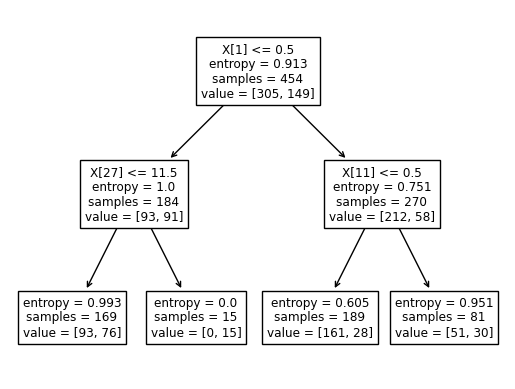

In [124]:
tree.plot_tree(dtree)

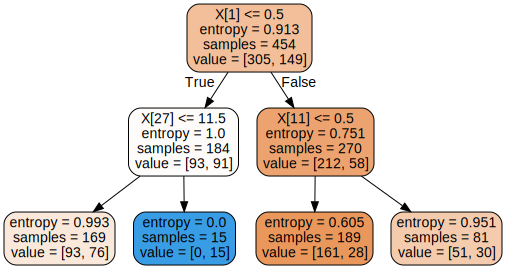

In [125]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph